In [1]:
import os
# Change native directory to root
os.chdir(os.path.dirname(os.getcwd()))

In [75]:
import pandas as pd
import numpy as np
from forecast.metrics import crps
# plot CRPS scores for each horizon
import matplotlib.pyplot as plt
from cycler import cycler

In [6]:
# open csv file for scenarios
scens = pd.read_csv('debug_logs/scenarios_point_and_variance_p1.csv')
scens

,time_step,scenario,building,+1h,+2h,+3h,+4h,+5h,+6h,+7h,...,+15h,+16h,+17h,+18h,+19h,+20h,+21h,+22h,+23h,+24h
0,0,0,0,1.174578,-0.978735,-0.930768,-1.154253,-0.914358,-0.581429,-0.602405,...,-1.036833,-1.166210,-0.159654,0.223371,-0.001311,0.075816,-0.280135,-1.373695,-1.000311,-0.939288
1,0,0,1,0.492962,-0.590275,-1.182318,-1.079209,-0.403129,-0.622702,-0.706671,...,-0.847446,-0.504486,-0.040699,-0.101848,-0.608349,-0.323820,-1.165168,-0.966422,-0.506016,-1.329590
2,0,0,2,-1.032145,-1.209802,-1.669238,-1.562547,-0.964545,-1.396137,-1.288957,...,-1.789294,-1.565947,-0.750864,-0.930754,-0.720852,-0.844530,-1.769777,-1.746396,-1.578181,-1.244607
3,0,0,3,1.073633,-0.872798,-1.629407,-1.906051,-1.612159,-1.540039,-1.228372,...,-0.991402,-1.187047,-1.010294,-0.641333,-1.554884,-0.610182,-0.635115,-1.451325,-0.919165,-1.090702
4,0,0,4,0.035512,-1.457885,-1.599486,-1.908076,-0.569714,-1.046940,-1.138085,...,-0.779457,-1.206630,-1.419744,-0.892312,-0.805790,-0.652330,-0.650801,-1.284845,-1.265259,-0.941883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437995,8759,9,0,2.057834,1.177753,0.348245,0.426647,0.849198,0.598197,0.375792,...,0.501012,0.786320,0.743811,1.833070,1.344823,1.684536,2.982464,2.871887,2.491966,2.467003
437996,8759,9,1,2.257851,0.669517,0.592456,0.641260,1.712513,0.554308,0.550684,...,0.557170,0.945650,-0.786990,-0.213683,-0.208239,1.908240,0.578932,1.816353,2.067238,1.905874
437997,8759,9,2,0.222746,-0.165178,0.012980,0.509997,0.580239,0.758037,-0.611246,...,-0.973811,-0.591283,-0.270580,-0.646775,0.513639,0.678016,0.973265,0.843901,0.116747,-0.894697
437998,8759,9,3,1.967523,0.985586,1.639501,1.025583,0.967045,0.950992,0.160888,...,0.105452,0.786714,0.527296,0.385375,1.137587,1.510073,0.724431,0.655580,0.775716,1.351027


In [151]:
reals = pd.read_csv('debug_logs/real_power_recurrent_gaussian_qts_9000_1.csv')
reals

,time_step,building_0,building_1,building_2,building_3,building_4
0,-1,2.275800,2.188750,1.009623e-07,2.819150,0.771433
1,0,0.851167,1.370667,1.018524e-07,1.928167,0.515883
2,1,0.834600,1.101250,1.008352e-07,0.475817,0.503050
3,2,0.838167,0.543217,1.007080e-07,0.458233,0.535950
4,3,1.478433,0.542833,1.015981e-07,0.446017,0.512617
...,...,...,...,...,...,...
8755,8754,1.314867,1.502683,1.417733e+00,1.591967,2.713900
8756,8755,2.566167,0.803133,1.075767e+00,0.389433,0.935833
8757,8756,3.151700,2.194633,1.162883e+00,1.186483,2.155017
8758,8757,3.021500,1.456333,1.107300e+00,3.155883,2.316400


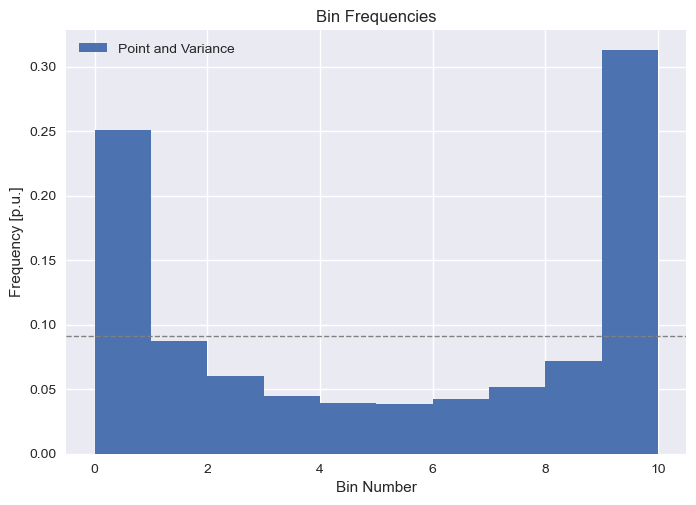

In [156]:
# plot bin frequencies in per unit for bins and bins_recur next to each other
plt.hist([bins_recur], density=True, linewidth=2, fill=True)

# legend
plt.legend(['Point and Variance', 'Recurrent Quantile', 'Quantiles'])

# make it pretty
plt.title('Bin Frequencies')
plt.xlabel('Bin Number')
plt.ylabel('Frequency [p.u.]')

# set style to b&w
plt.style.use('seaborn')

# mark the probability of the real value falling in the bin
plt.axhline(y=1/11, color='grey', linestyle='--', linewidth=1)

# illustrate the 95% intervals determined from making a binomial assumption on the observation falling in the bin
# plt.axhline(y=1/11 + 0.05 * np.sqrt(1/11 * (1 - 1/11) / 11), color='grey', linestyle='--', linewidth=1)
# plt.axhline(y=1/11 - 0.05 * np.sqrt(1/11 * (1 - 1/11) / 11), color='grey', linestyle='--', linewidth=1)

# show the plot
plt.show()

In [152]:
scens_recur = pd.read_csv('debug_logs/scenarios_recurrent_gaussian_qts_9000_1.csv')

In [171]:
scens_qts = pd.read_csv('debug_logs/scenarios_quantiles_9000_1.csv')
scens_qts

,time_step,scenario,building,+1h,+2h,+3h,+4h,+5h,+6h,+7h,...,+15h,+16h,+17h,+18h,+19h,+20h,+21h,+22h,+23h,+24h
0,0,0,0,-2.347833,-2.345349,-2.348884,-2.329539,-2.430819,-2.494549,-2.519137,...,-2.453647,-2.407560,-2.449255,-2.368727,-2.369379,-2.344357,-2.359283,-2.364457,-2.363073,-2.343762
1,0,0,1,-1.891683,-1.889822,-1.892470,-1.877974,-1.953869,-2.001624,-2.020049,...,-1.970974,-1.936439,-1.967683,-1.907340,-1.907828,-1.889078,-1.900263,-1.904140,-1.903103,-1.888633
2,0,0,2,-2.358503,-2.356828,-2.359212,-2.346165,-2.414469,-2.457449,-2.474031,...,-2.429864,-2.398783,-2.426902,-2.372594,-2.373034,-2.356159,-2.366225,-2.369715,-2.368781,-2.355758
3,0,0,3,-2.243622,-2.241913,-2.244345,-2.231039,-2.300702,-2.344537,-2.361450,...,-2.316404,-2.284704,-2.313383,-2.257993,-2.258442,-2.241231,-2.251497,-2.255056,-2.254105,-2.240822
4,0,0,4,-2.180700,-2.178987,-2.181424,-2.168089,-2.237904,-2.281834,-2.298783,...,-2.253639,-2.221870,-2.250612,-2.195102,-2.195551,-2.178303,-2.188592,-2.192159,-2.191205,-2.177893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919795,8759,20,0,5.560911,4.996783,5.126696,5.117782,5.126064,4.965462,5.139701,...,5.085977,5.320123,5.359972,5.973833,6.020791,5.891685,6.446108,6.233435,6.390299,5.765749
919796,8759,20,1,4.038631,3.609310,3.771455,3.812429,4.188056,3.588497,3.719062,...,4.154260,4.291917,3.483245,3.765595,3.923772,4.687268,4.274141,4.621089,4.562685,3.744229
919797,8759,20,2,2.986647,2.955607,3.087554,3.082715,3.088301,3.042421,3.008940,...,2.720473,2.812794,2.839668,3.285468,3.292114,3.240746,3.395718,3.531487,3.419171,2.687371
919798,8759,20,3,3.469658,3.380539,3.463425,3.305908,3.304693,3.519619,3.230664,...,2.797377,3.030614,3.256336,3.456145,3.538054,3.414540,3.785885,3.688308,3.714546,3.278801


In [170]:
scens_qts_3scen

,time_step,scenario,building,+1h,+2h,+3h,+4h,+5h,+6h,+7h,...,+15h,+16h,+17h,+18h,+19h,+20h,+21h,+22h,+23h,+24h
0,0,0,0,-2.347833,-2.345349,-2.348884,-2.329539,-2.430819,-2.494549,-2.519137,...,-2.453647,-2.407560,-2.449255,-2.368727,-2.369379,-2.344357,-2.359283,-2.364457,-2.363073,-2.343762
1,0,0,1,-1.891683,-1.889822,-1.892470,-1.877974,-1.953869,-2.001624,-2.020049,...,-1.970974,-1.936439,-1.967683,-1.907340,-1.907828,-1.889078,-1.900263,-1.904140,-1.903103,-1.888633
2,0,0,2,-2.358503,-2.356828,-2.359212,-2.346165,-2.414469,-2.457449,-2.474031,...,-2.429864,-2.398783,-2.426902,-2.372594,-2.373034,-2.356159,-2.366225,-2.369715,-2.368781,-2.355758
3,0,0,3,-2.243622,-2.241913,-2.244345,-2.231039,-2.300702,-2.344537,-2.361450,...,-2.316404,-2.284704,-2.313383,-2.257993,-2.258442,-2.241231,-2.251497,-2.255056,-2.254105,-2.240822
4,0,0,4,-2.180700,-2.178987,-2.181424,-2.168089,-2.237904,-2.281834,-2.298783,...,-2.253639,-2.221870,-2.250612,-2.195102,-2.195551,-2.178303,-2.188592,-2.192159,-2.191205,-2.177893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131395,8759,20,0,5.560911,4.996783,5.126696,5.117782,5.126064,4.965462,5.139701,...,5.085977,5.320123,5.359972,5.973833,6.020791,5.891685,6.446108,6.233435,6.390299,5.765749
131396,8759,20,1,4.038631,3.609310,3.771455,3.812429,4.188056,3.588497,3.719062,...,4.154260,4.291917,3.483245,3.765595,3.923772,4.687268,4.274141,4.621089,4.562685,3.744229
131397,8759,20,2,2.986647,2.955607,3.087554,3.082715,3.088301,3.042421,3.008940,...,2.720473,2.812794,2.839668,3.285468,3.292114,3.240746,3.395718,3.531487,3.419171,2.687371
131398,8759,20,3,3.469658,3.380539,3.463425,3.305908,3.304693,3.519619,3.230664,...,2.797377,3.030614,3.256336,3.456145,3.538054,3.414540,3.785885,3.688308,3.714546,3.278801


In [178]:
# keep only scenarios 0 ,10, 20
scens_qts_3scen = scens_qts.loc[scens_qts['scenario'].isin([0, 10, 20])]
# reset index
scens_qts_3scen = scens_qts_3scen.reset_index(drop=True)
# replace scenario numbers with 1, 2, 3
scens_qts_3scen['scenario'] = scens_qts_3scen['scenario'].replace([0, 10, 20], [0, 1, 2])
# save to csv
scens_qts_3scen.to_csv('debug_logs/scenarios_quantiles_9000_3scen.csv', index=False)

In [179]:
# keep only 0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20
scens_qts_11scen = scens_qts.loc[scens_qts['scenario'].isin([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20])]
# reset index
scens_qts_11scen = scens_qts_11scen.reset_index(drop=True)
# replace scenario numbers with 1, 2, 3
scens_qts_11scen['scenario'] = scens_qts_11scen['scenario'].replace([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
# save to csv
scens_qts_11scen.to_csv('debug_logs/scenarios_quantiles_9000_11scen.csv', index=False)

In [180]:
# keep only 10 scenarios
scens_qts_10scen = scens_qts.loc[scens_qts['scenario'].isin([1, 3, 5, 7, 9, 11, 13, 15, 17, 19])]
# reset index
scens_qts_10scen = scens_qts_10scen.reset_index(drop=True)
# replace scenario numbers with 1, 2, 3
scens_qts_10scen['scenario'] = scens_qts_10scen['scenario'].replace([1, 3, 5, 7, 9, 11, 13, 15, 17, 19], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
# save to csv
scens_qts_10scen.to_csv('debug_logs/scenarios_quantiles_9000_10scen.csv', index=False)

In [176]:
scens_qts_3scen

,time_step,scenario,building,+1h,+2h,+3h,+4h,+5h,+6h,+7h,...,+15h,+16h,+17h,+18h,+19h,+20h,+21h,+22h,+23h,+24h
0,0,0,0,-2.347833,-2.345349,-2.348884,-2.329539,-2.430819,-2.494549,-2.519137,...,-2.453647,-2.407560,-2.449255,-2.368727,-2.369379,-2.344357,-2.359283,-2.364457,-2.363073,-2.343762
1,0,0,1,-1.891683,-1.889822,-1.892470,-1.877974,-1.953869,-2.001624,-2.020049,...,-1.970974,-1.936439,-1.967683,-1.907340,-1.907828,-1.889078,-1.900263,-1.904140,-1.903103,-1.888633
2,0,0,2,-2.358503,-2.356828,-2.359212,-2.346165,-2.414469,-2.457449,-2.474031,...,-2.429864,-2.398783,-2.426902,-2.372594,-2.373034,-2.356159,-2.366225,-2.369715,-2.368781,-2.355758
3,0,0,3,-2.243622,-2.241913,-2.244345,-2.231039,-2.300702,-2.344537,-2.361450,...,-2.316404,-2.284704,-2.313383,-2.257993,-2.258442,-2.241231,-2.251497,-2.255056,-2.254105,-2.240822
4,0,0,4,-2.180700,-2.178987,-2.181424,-2.168089,-2.237904,-2.281834,-2.298783,...,-2.253639,-2.221870,-2.250612,-2.195102,-2.195551,-2.178303,-2.188592,-2.192159,-2.191205,-2.177893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131395,8759,2,0,5.560911,4.996783,5.126696,5.117782,5.126064,4.965462,5.139701,...,5.085977,5.320123,5.359972,5.973833,6.020791,5.891685,6.446108,6.233435,6.390299,5.765749
131396,8759,2,1,4.038631,3.609310,3.771455,3.812429,4.188056,3.588497,3.719062,...,4.154260,4.291917,3.483245,3.765595,3.923772,4.687268,4.274141,4.621089,4.562685,3.744229
131397,8759,2,2,2.986647,2.955607,3.087554,3.082715,3.088301,3.042421,3.008940,...,2.720473,2.812794,2.839668,3.285468,3.292114,3.240746,3.395718,3.531487,3.419171,2.687371
131398,8759,2,3,3.469658,3.380539,3.463425,3.305908,3.304693,3.519619,3.230664,...,2.797377,3.030614,3.256336,3.456145,3.538054,3.414540,3.785885,3.688308,3.714546,3.278801


In [45]:
def rank_bins(scens, reals):
    # for each lead time, find the bin that the real value is in
    bins = []
    # loop over steps ahead
    for step in scens['time_step'].unique():
        # loop over buildings
        for building in scens['building'].unique():
            temp = scens.loc[scens['time_step'] == step].loc[scens['building'] == building]
            for i in range(1, 25):
                build_col = 'building_{}'.format(building)
                real_value = reals.loc[reals['time_step'] == i+1, build_col].values[0]
                column_name = '+{}h'.format(i)
                bin_number = temp[column_name].sort_values().reset_index(drop=True).searchsorted(real_value)
                bins.append(bin_number)
    return bins

In [144]:
bins = rank_bins(scens, reals)

In [154]:
bins_recur = rank_bins(scens_recur, reals)

In [146]:
bins_qts = rank_bins(scens_qts, reals)

In [68]:
scens_quant = pd.read_csv('debug_logs/scenarios_quantiles_9000_1.csv')
scens_quant

,time_step,scenario,building,+1h,+2h,+3h,+4h,+5h,+6h,+7h,...,+15h,+16h,+17h,+18h,+19h,+20h,+21h,+22h,+23h,+24h
0,0,0,0,-2.347833,-2.345349,-2.348884,-2.329539,-2.430819,-2.494549,-2.519137,...,-2.453647,-2.407560,-2.449255,-2.368727,-2.369379,-2.344357,-2.359283,-2.364457,-2.363073,-2.343762
1,0,0,1,-1.891683,-1.889822,-1.892470,-1.877974,-1.953869,-2.001624,-2.020049,...,-1.970974,-1.936439,-1.967683,-1.907340,-1.907828,-1.889078,-1.900263,-1.904140,-1.903103,-1.888633
2,0,0,2,-2.358503,-2.356828,-2.359212,-2.346165,-2.414469,-2.457449,-2.474031,...,-2.429864,-2.398783,-2.426902,-2.372594,-2.373034,-2.356159,-2.366225,-2.369715,-2.368781,-2.355758
3,0,0,3,-2.243622,-2.241913,-2.244345,-2.231039,-2.300702,-2.344537,-2.361450,...,-2.316404,-2.284704,-2.313383,-2.257993,-2.258442,-2.241231,-2.251497,-2.255056,-2.254105,-2.240822
4,0,0,4,-2.180700,-2.178987,-2.181424,-2.168089,-2.237904,-2.281834,-2.298783,...,-2.253639,-2.221870,-2.250612,-2.195102,-2.195551,-2.178303,-2.188592,-2.192159,-2.191205,-2.177893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160745,3214,9,0,2.680478,2.024919,1.949706,2.079241,1.939529,2.268824,2.349814,...,2.098589,2.041820,2.561471,2.788884,3.590961,4.843480,4.326585,3.570050,3.343344,2.760920
160746,3214,9,1,2.766611,2.585472,2.315665,2.254497,2.120984,2.196308,2.193535,...,1.407893,1.653401,1.790656,2.343571,3.008758,3.235797,3.357267,2.984076,3.094180,2.971283
160747,3214,9,2,1.608820,1.296730,1.272883,1.222305,1.133047,1.640378,1.181801,...,0.648741,0.870916,1.444897,1.482347,1.619252,1.848459,1.834320,1.632790,1.671833,1.596640
160748,3214,9,3,1.901716,1.350579,1.185994,1.464954,1.518503,1.347994,1.532724,...,0.860665,0.968398,1.639010,1.588887,1.858208,2.047083,2.043842,1.906191,2.396108,1.689112
